**Assignment 4 - Working With Pandas**

**Umit Kilinc 101232721**

In [47]:
# 1. Download the test.csv file and store it in a DataFrame named, myDF.

import pandas as pd
DF = pd.read_csv("/content/test.csv")

In [48]:
# 2.	Show the first three rows of the DF.
DF.iloc[:3]

,ID,Range,Value,Type,Zip Code,Model,Cost,Continent
0,10,192,50,F,NXEYEM,EX85,[56$],Asia
1,20,299,21,M,VNFKZD,CT41,[18$],Asia
2,30,378,28,X,IMGMFY,VN81,[90$],North America


In [49]:
# 3.	Delete the ‘Model’ column from the DF temporarily.
DF.drop(["Model"], axis = 1)

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa
...,...,...,...,...,...,...,...
945,9460,136,12,C,HGVBPV,[51$],South America
946,9470,316,46,L,SHBAUD,[33$],North America
947,9480,461,46,K,PUZUVO,[12$],Europe
948,9490,185,13,N,UMESZO,[39$],North America


In [50]:
# 4.	Delete the ‘Model’ column permanently, using the assignment (Not inplace parameter). Is there any 
# output when you run the permanent deletion? So, how can you make sure it is deleted?
del DF["Model"]
DF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
1,20,299,21,M,VNFKZD,[18$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
3,40,156,44,Q,RHRHJY,[89$],Asia
4,50,468,33,J,HPQCMC,[95$],Africa


In [51]:
# 5.	Now, let’s delete rows 1, 3, and 5 permanently, using inplace. Then show the first 4 Rows of myDF.
DF.drop([1, 3, 5], axis = 0, inplace = True)
DF.iloc[:4]

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,F,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,F,NLVQPY,[25$],Europe


In [52]:
# 6.	Calculate the mean of ‘Range’ column.
DF[["Range"]].mean()

Range    297.533263
dtype: float64

In [86]:
# 7.	How many ‘F’ do we have in the ‘Type’ column? Replace them permanently with ‘AAA’ and show the first 5 rows.
DF[DF["Type"] == "F"]
DF.loc[DF["Type"] == "F", ["Type"]] = "AAA"
DF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,[56$],Asia
2,30,378,28,X,IMGMFY,[90$],North America
4,50,468,33,J,HPQCMC,[95$],Africa
6,70,327,24,AAA,NLVQPY,[25$],Europe
7,80,495,50,Z,DLUMAX,[70$],Antarctica


In [89]:
# 8.	Get rid of the [, $ and ] from the ‘Cost’ column permanently and display the first 5 rows. What is the type of ‘Cost’ column after this?
DF["Cost"] = DF["Cost"].str.replace("[", "").str.replace("]", "").str.replace("$", "")
DF.head()

<ipython-input-89-bfc9199f3d66>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  DF["Cost"] = DF["Cost"].str.replace("[", "").str.replace("]", "").str.replace("$", "")


,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


In [90]:
# Type of Cost column
type(DF["Cost"])

pandas.core.series.Series

In [91]:
# 9.	Change the ‘Cost’ column data type to integer and display the result.
DF["Cost"] = DF["Cost"].astype(int)
DF.head()

,ID,Range,Value,Type,Zip Code,Cost,Continent
0,10,192,50,AAA,NXEYEM,56,Asia
2,30,378,28,X,IMGMFY,90,North America
4,50,468,33,J,HPQCMC,95,Africa
6,70,327,24,AAA,NLVQPY,25,Europe
7,80,495,50,Z,DLUMAX,70,Antarctica


In [92]:
# 10.	Calculate the average of ‘Cost’ column. Then, calculate the average of ‘Cost’ for each ‘Continent’.
DF["Cost"].mean()

54.586061246040124

In [93]:
# Average Cost for each Continent
DF.groupby("Continent")["Cost"].mean()

Continent
Africa           54.741259
Antarctica       54.706897
Asia             54.279070
Australia        56.838028
Europe           53.258993
North America    55.006993
South America    53.162963
Name: Cost, dtype: float64

In [94]:
# 11.	Calculate the min, max and standard deviation of the ‘Cost’ column, group by each ‘Continent’, all in one command.
DF.groupby("Continent")["Cost"].agg(["min", "max", "std"])

,min,max,std
Continent,,,
Africa,11,97,25.961432
Antarctica,10,97,24.880590
Asia,10,99,26.109737
Australia,10,97,26.057121
Europe,10,99,26.185054
North America,10,99,25.664821
South America,10,98,25.724780


In [95]:
# 12.	Calculate the min, max and standard deviation of all numerical columns, group by each ‘Continent’, all in one command.
DF_numerical = DF.select_dtypes(include="number")
DF_numerical.loc[:, "Continent"] = DF["Continent"]
DF_numerical.groupby("Continent", as_index = False).agg(["min", "max", "std"])

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


ID                    Range                  Value      \
               min   max          std   min  max         std   min max   
Continent                                                                
Africa          50  9450  2614.387519   100  494  118.110406    10  50   
Antarctica      80  9370  2936.313786   106  495  114.401370    10  50   
Asia            10  9390  2683.431665   103  499  112.047425    10  50   
Australia      120  9410  2793.945560   104  496  116.374530    10  50   
Europe          70  9480  2623.991892   101  500  116.808685    10  50   
North America   30  9490  2841.216413   104  500  113.611333    11  50   
South America   90  9500  2656.186804   104  499  117.375623    10  50   

                         Cost                 
                     std  min max        std  
Continent                                     
Africa         12.498931   11  97  25.961432  
Antarctica     11.978316   10  97  24.880590  
Asia           11.752819   10  99  26.109737  
Australia      13.138226   10  97  26.057121  
Europe         11.999544   10  99  26.185054  
North America  12.319601   10  99  25.664821  
South America  11.762450   10  98  25.724780

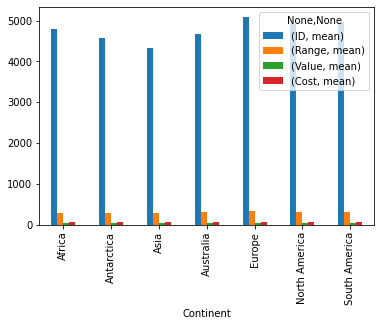

In [96]:
# 13.	Illustrate the mean of all numerical columns, group by the ‘Continent’, using a ‘bar’ chart.
%matplotlib inline
DF_numerical.groupby("Continent" , as_index=False).agg(["mean"]).plot(kind="bar")

In [97]:
# 14.	Count the number of each continent in the ‘Continent’ column. 
DF["Continent"].value_counts()

North America    143
Africa           143
Australia        142
Europe           139
South America    135
Asia             129
Antarctica       116
Name: Continent, dtype: int64

In [100]:
# 15.	Show the percentage of each continent in the ‘Continent’ column. 
DF["Continent"].value_counts(normalize=True)

North America    0.151003
Africa           0.151003
Australia        0.149947
Europe           0.146779
South America    0.142555
Asia             0.136220
Antarctica       0.122492
Name: Continent, dtype: float64

In [16]:
# 16.	Show the unique values that we have in the ‘Continent’ column. Then show the number of unique values that we have in the ‘Continent’ column.

In [17]:
# 17.	Use the value_count method for the ‘Cost’ column and describe the output as a comment in the next cell, using the # for the comment.

In [18]:
# 18.	Plot a histogram for the ‘Cost’ column. 

In [19]:
# 19.	Bonus question: Try to change the number of bins to 50 to show the result more accurately.

In [33]:
# 20.	How many missing values do we have in the ‘Zip Code’ column? How many missing values in the ‘Type’ column? 
# Provide a brief summary of null values for the entire Data Frame.

In [22]:
# 21.	If we drop all the rows that have ‘any’ missing value, how many rows will remain in myDF?

In [23]:
# 22.	Show the statistics for the ‘Type’ column using the value_count method, including the NaN values in the list. How many missing values do we have?

In [24]:
# 23.	Replace the ‘Type’ column missing values with ‘XXX’ and show the result again.

In [25]:
# 24.	Drop the rows that have any missing value permanently and show the number of rows after running the drop command.

In [26]:
# 25.	Set the ‘ID’ column as the new index and delete the index name. Then show the first 5 rows of the DF. 
#Show the value of the cell that its ID is 70 and its column header is ‘Value’.

In [27]:
# 26.	Show the index, columns and the shape of the current DF. Bring back the ID column to the DF and reset the index. 
# Again, show the index, columns and the shape of the current DF.

In [28]:
# 27.	Use the describe method to see the statistics of myDF and fetch the value of the first row and the third column of the result.

In [29]:
# 28.	Sort the value_counts() of the ‘Continent’ column of the DF. 
# Then, sort the value_counts() of the ‘Continent’ column, based on the alphabetic order of the continents.

In [30]:
# 29.	Show all the columns of the following rows in one command. [1,3,5,7] and show the first 7 rows of the following columns: ‘Type’ and ‘Continent’

In [ ]:
# 30.	Show the ‘Value’ of the ‘Type’ that are equal to ’XXX’.